# Diabetes-Prediction-Model

### Step 2: Load the Dataset

In this step, we are going to install packages, load the dataset and remove unecessary and irrelevant attributes.

In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install missingno


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np  
import pandas as pd  
import os
import random

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno 

In [4]:
df = pd.read_csv('diabetes_data.csv')
df.shape

(70692, 18)

In [5]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [8]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan
    return df_missing
df = add_random_missing_values(df, missing_rate=0.02)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   67957 non-null  float64
 1   Sex                   67894 non-null  float64
 2   HighChol              67912 non-null  float64
 3   CholCheck             67967 non-null  float64
 4   BMI                   67898 non-null  float64
 5   Smoker                68045 non-null  float64
 6   HeartDiseaseorAttack  67953 non-null  float64
 7   PhysActivity          67911 non-null  float64
 8   Fruits                67919 non-null  float64
 9   Veggies               67912 non-null  float64
 10  HvyAlcoholConsump     67889 non-null  float64
 11  GenHlth               67849 non-null  float64
 12  MentHlth              67851 non-null  float64
 13  PhysHlth              67922 non-null  float64
 14  DiffWalk              67911 non-null  float64
 15  Stroke             

In [10]:
df.head(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0


In [11]:
df.tail(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0,2.0,0.0,0.0,0.0,0.0,1.0,NaN


# Step 3: Data Cleanup

In [12]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: Age
Unique Values: [ 4. 12. 13. 11.  8.  1. nan  6.  3.  7. 10.  9.  5.  2.]

Column: Sex
Unique Values: [ 1.  0. nan]

Column: HighChol
Unique Values: [ 0.  1. nan]

Column: CholCheck
Unique Values: [ 1. nan  0.]

Column: BMI
Unique Values: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. nan 38. 40. 25. 36.
 47. 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92.
 53. 98. 46. 79. 48. 16. 72. 54. 49. 68. 43. 50. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 63.
 62. 64. 66. 85. 70. 83. 80. 74.]

Column: Smoker
Unique Values: [ 0.  1. nan]

Column: HeartDiseaseorAttack
Unique Values: [ 0. nan  1.]

Column: PhysActivity
Unique Values: [ 1.  0. nan]

Column: Fruits
Unique Values: [ 0.  1. nan]

Column: Veggies
Unique Values: [ 1.  0. nan]

Column: HvyAlcoholConsump
Unique Values: [ 0. nan  1.]

Column: GenHlth
Unique Values: [ 3.  1.  2.  4.  5. nan]

Column: MentHlth
Unique Values: [ 5.  0.  7.  3.  4.  2. 30. 20

In [13]:
categorical_col = [col for col in df.columns if df[col].nunique() == 2] 

In [14]:
numerical_col = [col for col in df.columns if col not in categorical_col]

In [15]:
categorical_col

['Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

In [16]:
numerical_col

['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

In [25]:
df.columns[df.isnull().any()].tolist()

['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

In [26]:
df.isnull().sum()

Age                     2735
Sex                     2798
HighChol                2780
CholCheck               2725
BMI                     2794
Smoker                  2647
HeartDiseaseorAttack    2739
PhysActivity            2781
Fruits                  2773
Veggies                 2780
HvyAlcoholConsump       2803
GenHlth                 2843
MentHlth                2841
PhysHlth                2770
DiffWalk                2781
Stroke                  2761
HighBP                  2724
Diabetes                2808
dtype: int64

In [29]:
df[df.isnull().any(axis = 1)]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
1,12.0,1.0,1.0,1.0,26.0,1.0,NaN,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,NaN,3.0,0.0,3.0,0.0,NaN,1.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,NaN,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,NaN,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,NaN,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70684,9.0,1.0,1.0,1.0,27.0,0.0,1.0,NaN,0.0,1.0,0.0,4.0,30.0,5.0,0.0,0.0,1.0,1.0
70686,11.0,1.0,1.0,1.0,27.0,0.0,NaN,1.0,1.0,0.0,0.0,4.0,0.0,30.0,0.0,0.0,0.0,1.0
70687,NaN,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
70689,13.0,0.0,NaN,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0


In [30]:
df[df.notnull().all(axis = 1)]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70680,11.0,0.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,6.0,30.0,1.0,0.0,1.0,1.0
70682,9.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,0.0,1.0,1.0
70685,7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0


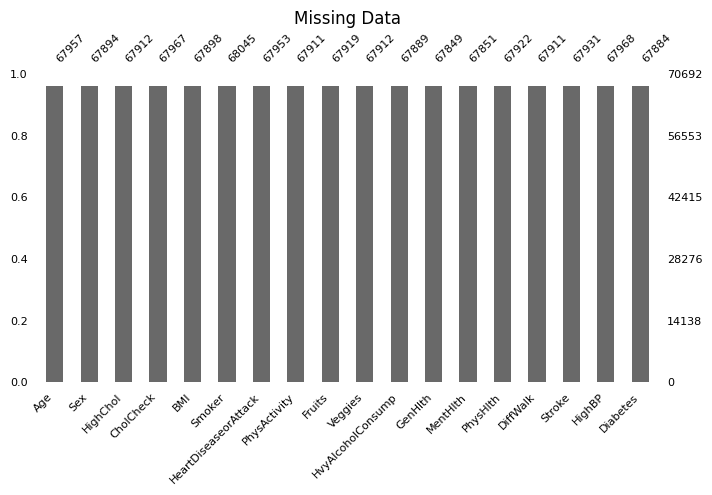

In [33]:
msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 8)
plt.title("Missing Data", fontsize=12)
plt.show()

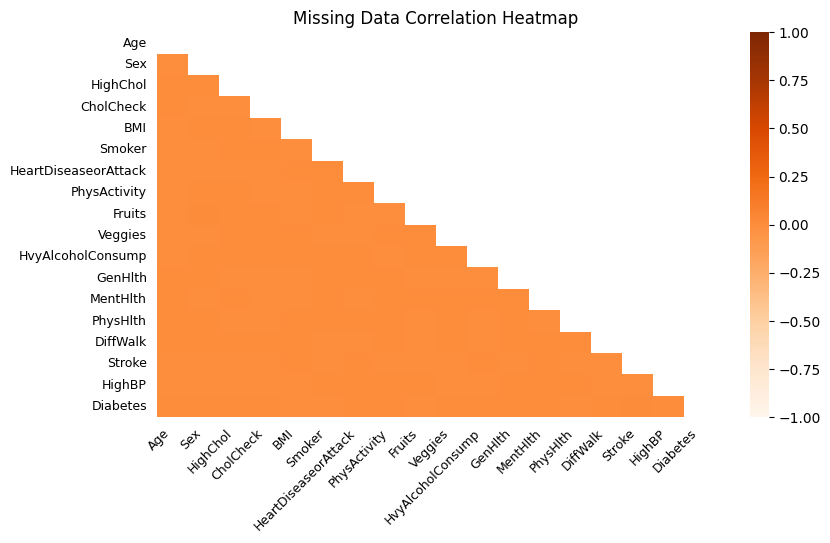

In [39]:
msno.heatmap(df = df,
             figsize = (9, 5),
             fontsize = 9,
             cmap='Oranges')
plt.title("Missing Data Correlation Heatmap", fontsize=12)
plt.show()

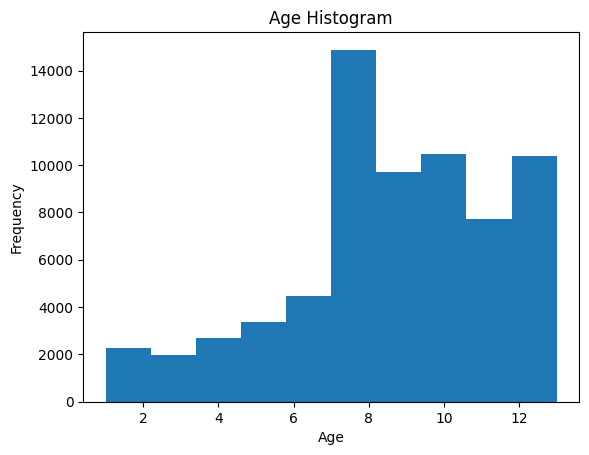

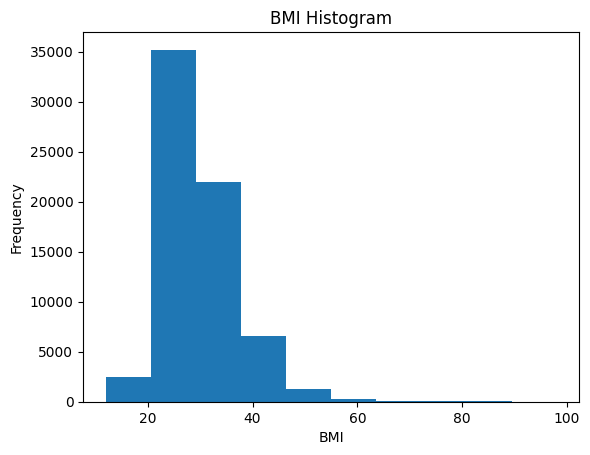

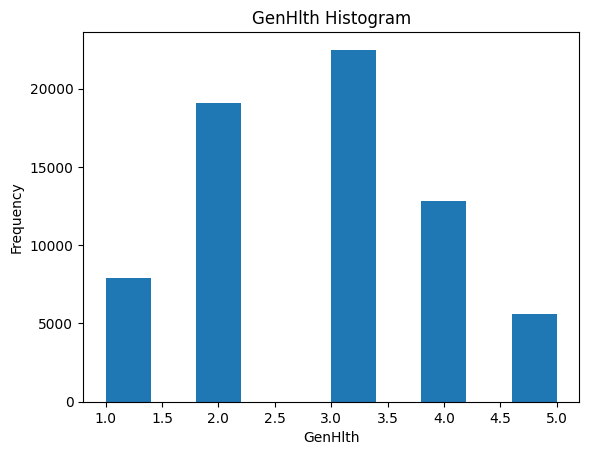

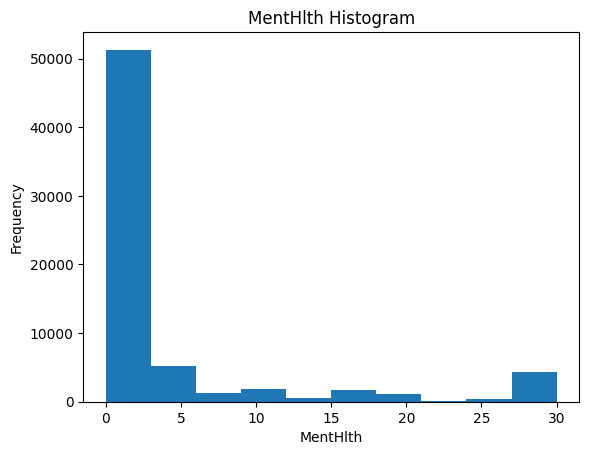

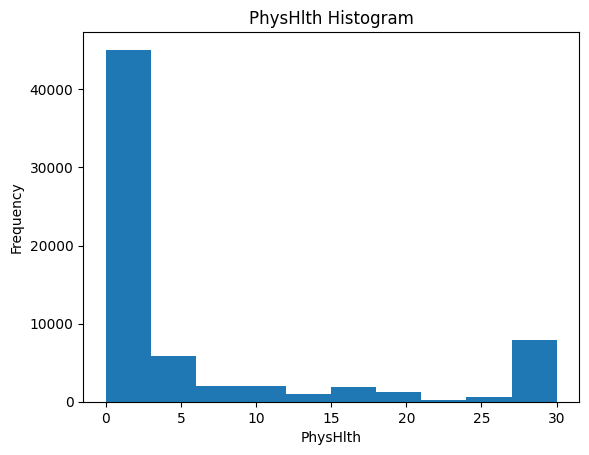

In [40]:
for col in numerical_col:
    plt.hist(df[col])
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [41]:
for col in numerical_col:
    mean = df[col].mean() 
    df[col] = df[col].fillna(mean)  

for col in categorical_col:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

print(df.isnull().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


In [42]:
df.head(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [44]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.585620,0.438904,0.544319,0.976108,29.854399,0.457973,0.141968,0.714635,0.626888,0.797021,0.041164,2.838863,3.742362,5.799947,0.242573,0.060134,0.580334,0.519960
std,2.794897,0.496257,0.498035,0.152715,6.971226,0.498234,0.349020,0.451591,0.483635,0.402220,0.198672,1.090502,7.977270,9.855034,0.428642,0.237737,0.493508,0.499605
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,5.799947,0.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

In [22]:
is_null.count

NameError: name 'is_null' is not defined